In [20]:
import pandas as pd 

In [21]:
df_final_demo = pd.read_csv("/Users/laurasuemitsu/Desktop/DATA_FT_May_2025/Week 5/Project/txt files/df_final_demo.txt")

df_final_demo.to_csv('df_fd.csv', index = False)

In [22]:
df_fd = pd.read_csv("/Users/laurasuemitsu/Desktop/DATA_FT_May_2025/Week 5/Project/CSV files/df_fd.csv")

In [23]:
df_grp = pd.read_csv("/Users/laurasuemitsu/Desktop/DATA_FT_May_2025/Week 5/Project/CSV files/df_final_experiment_clients.csv")

In [24]:
df_grp.drop(columns=["Unnamed: 0"], inplace=True)

In [25]:
df_demo_grp = pd.merge(left=df_fd, right=df_grp, how="inner", on="client_id")

## Dataset exploration

In [26]:
df_demo_grp.head()

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,Variation
0,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0,Test
1,2304905,7.0,94.0,58.0,U,2.0,110860.30,6.0,9.0,Control
2,1439522,5.0,64.0,32.0,U,2.0,52467.79,6.0,9.0,Test
3,1562045,16.0,198.0,49.0,M,2.0,67454.65,3.0,6.0,Test
4,5126305,12.0,145.0,33.0,F,2.0,103671.75,0.0,3.0,Control


In [27]:
df_demo_grp.shape

(70609, 10)

In [28]:
df_demo_grp.dtypes

client_id             int64
clnt_tenure_yr      float64
clnt_tenure_mnth    float64
clnt_age            float64
gendr                object
num_accts           float64
bal                 float64
calls_6_mnth        float64
logons_6_mnth       float64
Variation            object
dtype: object

In [29]:
df_demo_grp.select_dtypes("float").nunique().sort_values(ascending=False)
# didn't use number as dtype, because the client_id variable is for sure a categorical variable

bal                 70327
clnt_tenure_mnth      482
clnt_age              165
clnt_tenure_yr         54
logons_6_mnth           9
num_accts               8
calls_6_mnth            8
dtype: int64

In [30]:
df_demo_grp_num = df_demo_grp.drop(columns=["client_id", "gendr", "Variation"])

df_demo_grp_num.head()

,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,num_accts,bal,calls_6_mnth,logons_6_mnth
0,6.0,73.0,60.5,2.0,45105.30,6.0,9.0
1,7.0,94.0,58.0,2.0,110860.30,6.0,9.0
2,5.0,64.0,32.0,2.0,52467.79,6.0,9.0
3,16.0,198.0,49.0,2.0,67454.65,3.0,6.0
4,12.0,145.0,33.0,2.0,103671.75,0.0,3.0


In [31]:
df_demo_grp_cat = df_demo_grp.drop(df_demo_grp_num, axis = 1)
df_demo_grp_cat.head()

,client_id,gendr,Variation
0,836976,U,Test
1,2304905,U,Control
2,1439522,U,Test
3,1562045,M,Test
4,5126305,F,Control


In [32]:
df_demo_grp.duplicated().sum()

0

#### **No duplicates in the dataframe**.

In [33]:
df_demo_grp.isnull().sum().sort_values(ascending=False)

Variation           20109
clnt_age               15
clnt_tenure_yr         14
clnt_tenure_mnth       14
gendr                  14
num_accts              14
bal                    14
calls_6_mnth           14
logons_6_mnth          14
client_id               0
dtype: int64

In [34]:
df_demo_grp = df_demo_grp.dropna(subset=["Variation"])

In [35]:
df_demo_grp.shape

(50500, 10)

## Client behavior analysis

- Who are the primary clients using this online process?
- Are the primary clients younger or older, new or long-standing?

In [36]:
# Dividing the dataset into the two groups:

df_demo_test = df_demo_grp[df_demo_grp["Variation"] == "Test"]

df_demo_ctrl = df_demo_grp[df_demo_grp["Variation"] == "Control"]

In [37]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

### Clients' age:

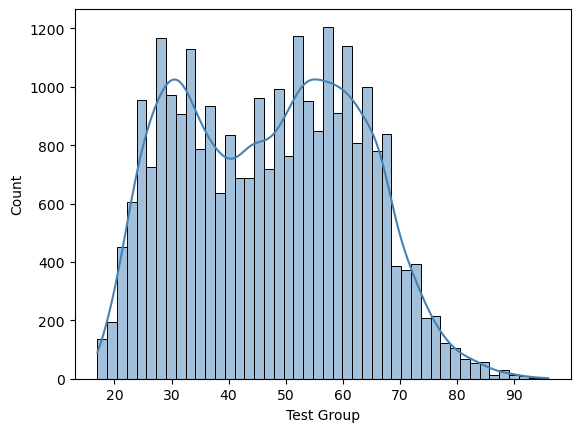

In [38]:
sns.histplot(df_demo_test["clnt_age"], kde = True, color = "steelblue")
plt.xlabel("Test Group")
plt.show()

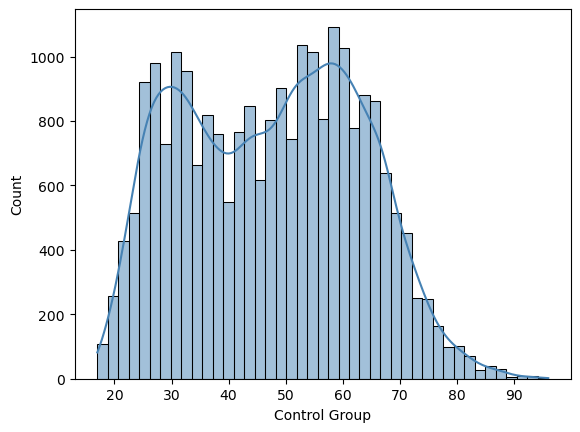

In [39]:
sns.histplot(df_demo_ctrl["clnt_age"], kde = True, color = "steelblue")
plt.xlabel("Control Group")
plt.show()

In [40]:
# 1. Test group

mean_age_t = round(df_demo_test["clnt_age"].mean(), 1)
median_age_t = df_demo_test["clnt_age"].median()
mode_age_t = df_demo_test["clnt_age"].mode()[0]

mean_age_t, median_age_t, mode_age_t

(47.2, 47.5, 29.5)

In [41]:
# 2. Control group

mean_age_c = round(df_demo_ctrl["clnt_age"].mean(), 1)
median_age_c = df_demo_ctrl["clnt_age"].median()
mode_age_c = df_demo_ctrl["clnt_age"].mode()[0]

mean_age_c, median_age_c, mode_age_c

(47.5, 48.5, 58.5)

In [42]:
# 3. Test group
max_age_t = df_demo_test["clnt_age"].max()
min_age_t = df_demo_test["clnt_age"].min()
range_age_t = max_age_t - min_age_t

max_age_t, min_age_t, range_age_t

(96.0, 17.0, 79.0)

In [43]:
# 4. Control group
max_age_c = df_demo_ctrl["clnt_age"].max()
min_age_c = df_demo_ctrl["clnt_age"].min()
range_age_c = max_age_c- min_age_c

max_age_c, min_age_c, range_age_c

(96.0, 17.0, 79.0)

### Clients' tenure year:

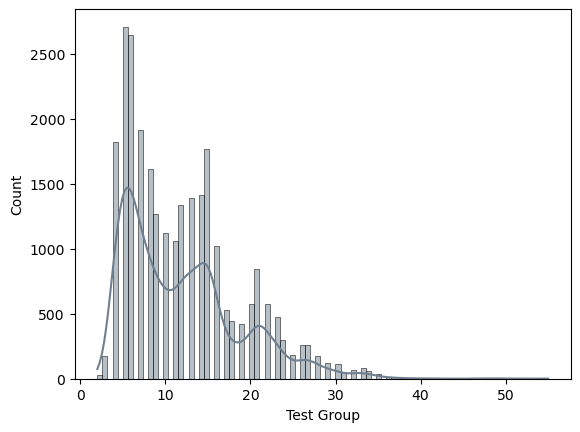

In [44]:
sns.histplot(df_demo_test["clnt_tenure_yr"], kde = True, color = "slategrey")
plt.xlabel("Test Group")
plt.show()

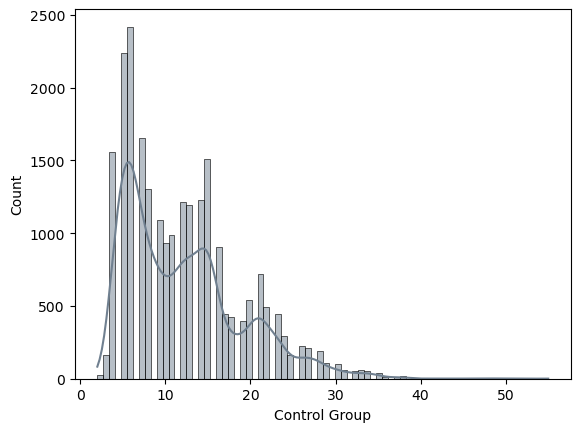

In [45]:
sns.histplot(df_demo_ctrl["clnt_tenure_yr"], kde = True, color = "slategrey")
plt.xlabel("Control Group")
plt.show()

In [46]:
mean_tenure_t = round(df_demo_test["clnt_tenure_yr"].mean(), 1)
median_tenure_t = df_demo_test["clnt_tenure_yr"].median()
mode_tenure_t = df_demo_test["clnt_tenure_yr"].mode()[0]

mean_tenure_t, median_tenure_t, mode_tenure_t

(12.0, 11.0, 5.0)

In [47]:
mean_tenure_c = round(df_demo_ctrl["clnt_tenure_yr"].mean(), 1)
median_tenure_c = df_demo_ctrl["clnt_tenure_yr"].median()
mode_tenure_c = df_demo_ctrl["clnt_tenure_yr"].mode()[0]

mean_tenure_c, median_tenure_c, mode_tenure_c

(12.1, 11.0, 6.0)

### Clients' balance

In [48]:
mean_bal_t = round(df_demo_test["bal"].mean(), 2)
median_bal_t = df_demo_test["bal"].median()
mode_bal_t = df_demo_test["bal"].mode()[0]

mean_bal_t, median_bal_t, mode_bal_t

(148962.61, 65468.36, 29389.11)

In [49]:
mean_bal_c = round(df_demo_ctrl["bal"].mean(), 2)
median_bal_c = df_demo_ctrl["bal"].median()
mode_bal_c = df_demo_ctrl["bal"].mode()[0]

mean_bal_c, median_bal_c, mode_bal_c

(150147.33, 66024.18, 31188.62)

In [50]:
max_bal_c = df_demo_ctrl["bal"].max()
min_bal_c = df_demo_ctrl["bal"].min()
range_bal_c = max_bal_c - min_bal_c

max_bal_c, min_bal_c, range_bal_c

(8292996.21, 23789.61, 8269206.6)

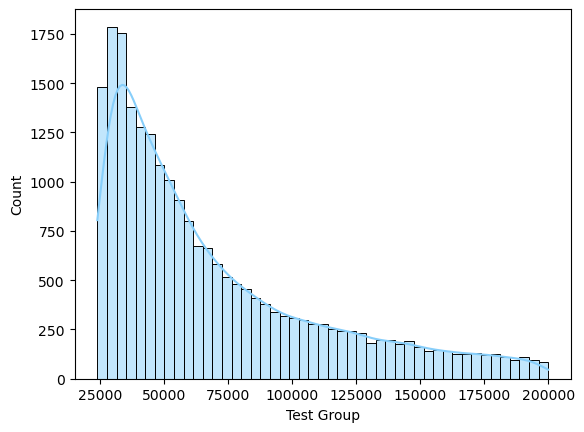

In [51]:
df_bal_t = df_demo_test[df_demo_test["bal"] < 200000]
sns.histplot(df_bal_t["bal"], kde = True, color="lightskyblue")
plt.xlabel("Test Group")
plt.show()


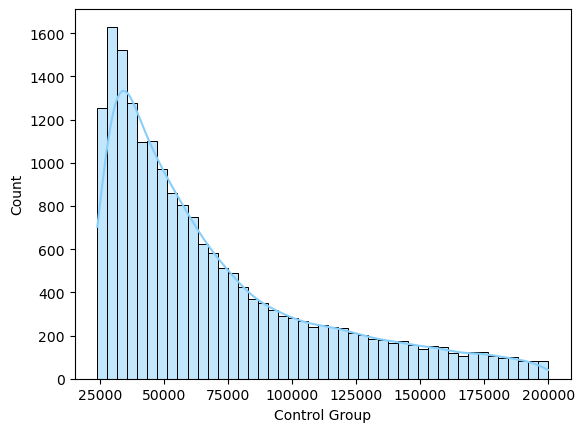

In [52]:
df_bal_c = df_demo_ctrl[df_demo_ctrl["bal"] < 200000]
sns.histplot(df_bal_c["bal"], kde = True, color="lightskyblue")
plt.xlabel("Control Group")
plt.show()